# Data Description

This notebook is used to initially explore the data to see what forms of preprocessing is required before building and testing the models.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Basic EDA

Here are what each feautre in the dataset represents:

![data_features](img/data_features.png)

In [2]:
# Import Data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=["object", "bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Missing Values

In [8]:
train_df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
p_age = 177 / train_df.shape[0]
p_cabin = 687 / train_df.shape[0]
p_embarked = 2 / train_df.shape[0]

print(f'Proportion of missing values in Age is {p_age:.3f}.')
print(f'Proportion of missing values in Cabin is {p_cabin:.3f}.')
print(f'Proportion of missing values in Embarked is {p_embarked:.3f}.')

Proportion of missing values in Age is 0.199.
Proportion of missing values in Cabin is 0.771.
Proportion of missing values in Embarked is 0.002.


From the output above, we see that majority of the variable do not have missing values. However, `Cabin` has a very large proportion of missing values (77%) and will be very difficult to correctly impute. This feature will be dropped. `Age` has a relatively low proportion of missing values (20%) when compared to `Cabin`, however 20% is still a large part of the dataset. We will need to determine how to correct the missing values to capture valuable information. Lastely, `Embarked` has a very low proportion (0.2%) with only two missing entries. Both `Age` and `Embarked` will need to be corrected.

In [10]:
train_df[train_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [11]:
train_df[train_df['Age'].isnull()].tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Age

One method of dealing with the missing values with `Age` is to input the age given the mean, median, or mode of a group. In this case, it might be useful to extract the title of each individual from their name and determine a summary statistic about the age in each group and impute the missing values based off of that. First let's extract the title from each individual's name and store that in a seperate column named `Title`.

In [12]:
train_df['Title'] = train_df['Name'].str.extract(r'([A-Za-z]+\.)')
train_df['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

Above we see all of the various titles that are included in the `Names` feature. Majority of the titles have either one or two instances in the whole dataset. If any observations that contain these low frequency titles have a missing age, it will be harder to impute the missing value since the group size is low. So let us check the number of missing observations each title has.

In [13]:
train_df.groupby('Title').Age.apply(lambda x: x.isna().sum()).sort_values()

Title
Capt.          0
Ms.            0
Mme.           0
Mlle.          0
Rev.           0
Major.         0
Sir.           0
Jonkheer.      0
Don.           0
Countess.      0
Col.           0
Lady.          0
Dr.            1
Master.        4
Mrs.          17
Miss.         36
Mr.          119
Name: Age, dtype: int64

From the ouput above, we see that out of the low frequency titles, `Dr.` is the only one that has a missing value. Fortunately we can use our intuition to say that this person is older than 16 as they would require a large number of years in schooling to achieve that title. Next, let's check the distribution of the remaining titles (`Master.`, `Mrs.`, `Miss.`, `Mr.`) with missing values to determine which summary statistic we should use to impute for each group.

In [14]:
# Create a list to iterate through with the remaining titles
remaining_titles = ['Master.', 'Mrs.', 'Miss.', 'Mr.']

In [15]:
# Create a mapping dictionary with the remaining titles and keys and plot colours as values
title_dict = {
    'Master.' : sns.color_palette(as_cmap=True)[0], 
    'Mrs.' : sns.color_palette(as_cmap=True)[1], 
    'Miss.' : sns.color_palette(as_cmap=True)[2], 
    'Mr.' : sns.color_palette(as_cmap=True)[3]
}

<Figure size 1200x800 with 0 Axes>

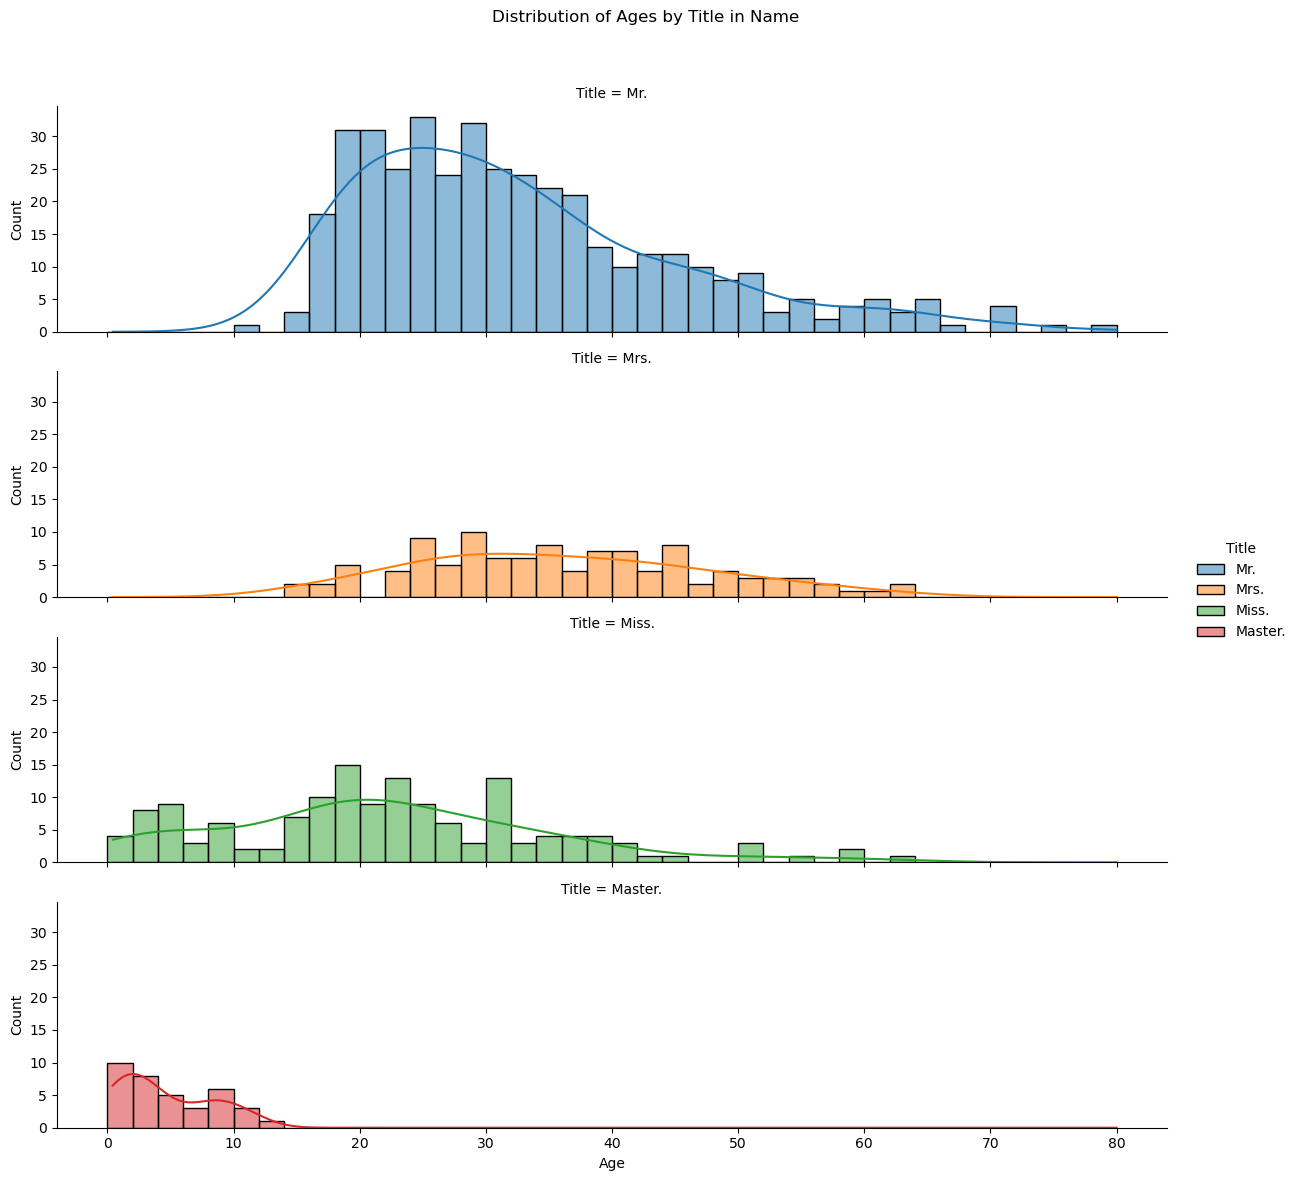

In [16]:
plt.figure(figsize=(12,8))

ax = sns.displot(
        data=train_df[train_df['Title'].isin(remaining_titles)],
        kind='hist',
        x='Age',
        binwidth=2,
        binrange=(0, 80),
        kde=True,
        row='Title',
        hue='Title',
        height=3,
        aspect=4
    )

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribution of Ages by Title in Name')

plt.show()

The distributions show that there is a fair amount of skew for the `Mr.`, `Miss.`, and `Master` titles and a wide bell shaped curve for the `Mrs.` title. Let's calculate and plot the mean and median to determine the central tendency for each group.

In [97]:
def age_title_plot(data, name_title, map_color, kde=True):
    # Filter data for specified Title only
    data_filtered = data[data['Title'] == name_title]

    # Adjust size of plot and add gridlines
    plt.figure(figsize=(12, 6))
        
    # Create histogram plot with KDE
    ax = sns.histplot(
        data=data_filtered,
        x='Age',
        binwidth=2,
        binrange=(0, 80),
        kde=True,
        color=map_color,
        edgecolor='white'
        )

    # Calculate mean and median Age for filtered dataset
    mean = np.nanmean(data_filtered['Age'])
    median = np.nanmedian(data_filtered['Age'])

    mean_max = mean - mean % 2
    median_max = median - median % 2

    print(mean_max, mean_max)
    
    # Create vertical lines for mean and median on histogram
    plt.axvline(mean, c='tab:red', ls='dashed', lw=1.5, label=f'Mean {mean:.2f}', ymax=mean_max)
    plt.axvline(median, c='tab:green', ls='dashed', lw=1.5, label=f'Median {median:.2f}', ymax=median_max)

    # Set locator values for major and minor tick marks (and for grid lines)
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_minor_locator(MultipleLocator(2))
    ax.set_axisbelow(True)
    
    # Add legend, title, and grid lines to each plot
    plt.legend()
    plt.title(f'Distribution of Ages for the {name_title} title.')
    plt.grid(which='both', alpha=0.10)


    plt.show()

4.0 4.0


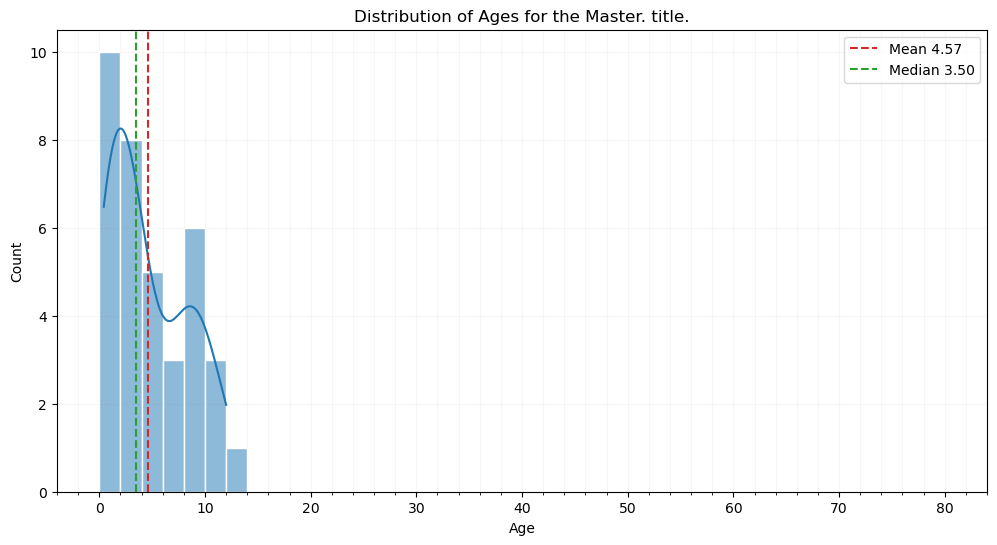

34.0 34.0


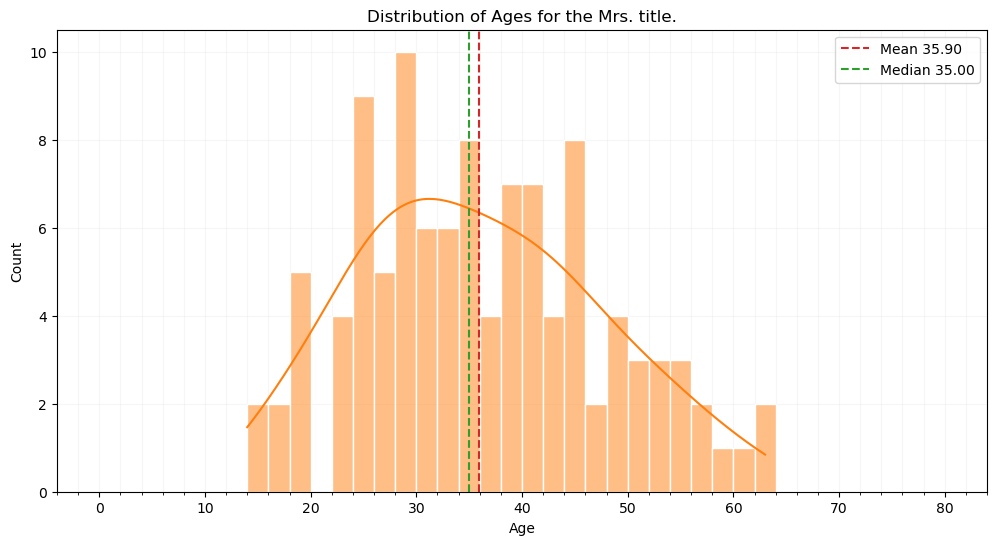

20.0 20.0


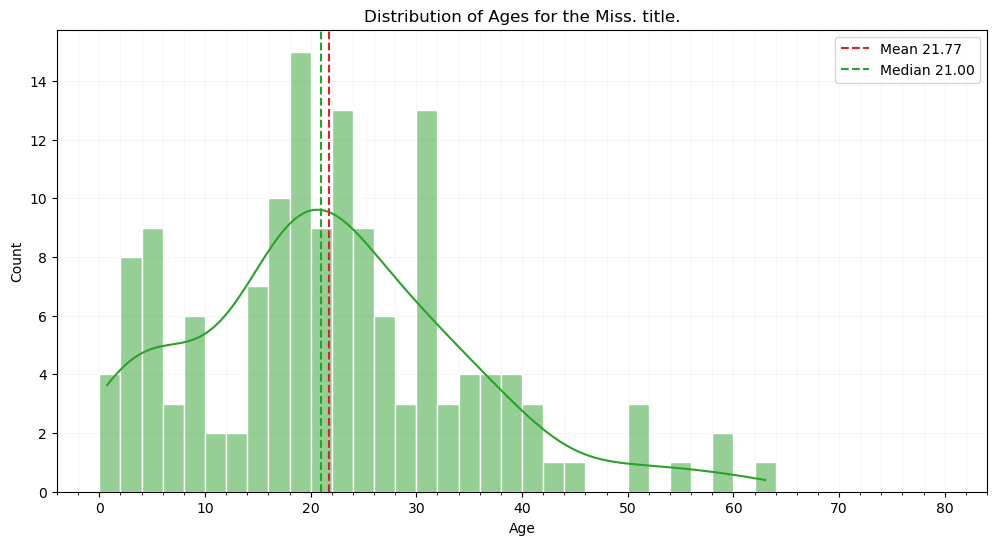

32.0 32.0


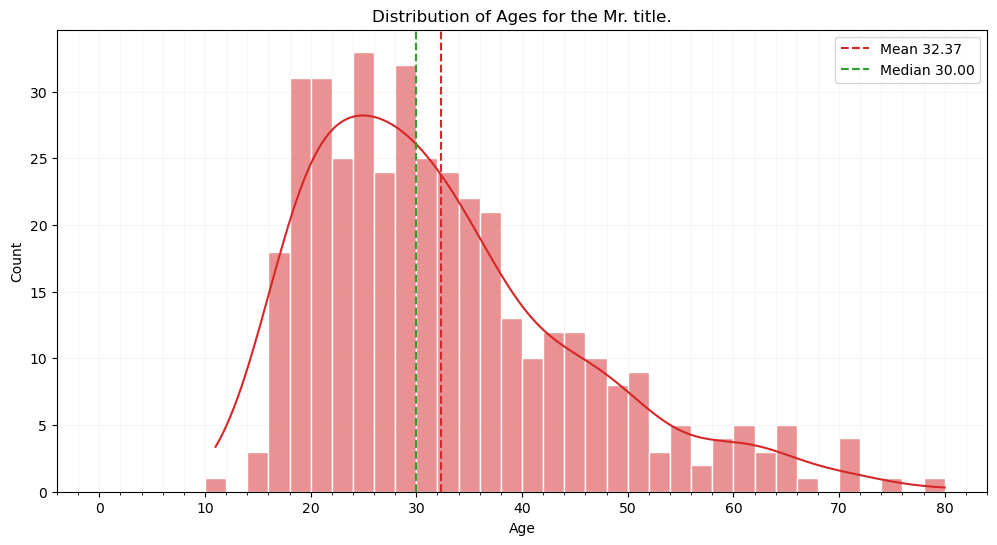

In [98]:
for title, color in title_dict.items():
    age_title_plot(train_df, title, color)

In [19]:
train_df[(train_df['Age'] < 18) & (train_df['Sex'] == 'male')].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master.
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master.
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,Master.
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,Master.
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Master.
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master.
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S,Mr.
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,Master.
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S,Mr.
163,164,0,3,"Calic, Mr. Jovo",male,17.00,0,0,315093,8.6625,NaN,S,Mr.


In [20]:
train_df[(train_df['Age'] < 16) & (train_df['Sex'] == 'female')].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss.
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss.
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss.
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Miss.
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,Miss.
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,Miss.
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,Miss.
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,Miss.
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Miss.


In [21]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss.
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs.


Above I've shown some very basic information about the data through some simple `pandas` EDA functions. Let's see what useful information we can extract to set us up for a successful solution going ahead.

1. The ***PassengerID*** variable is the unqiue numerical identifier for each passenger. Since each passenger will have a unique value, there is no need to include this variable in the study, it will be **dropped**.

2. The ***Survived*** variable describes whether or not the passenger survived and is our **target** class. The passenger either survived (1) or did not survive (0), therefore we have a binary classification problem.

3. The ***Pclass*** variable describes the socio-economic class value of the ticket of each passenger. It can take three values, `upper class` (1), `middle class` (2), and `lower class` (3). Since we have an hierarchal order (lower -> middle -> upper), this will be treated as an **ordinal categorical** variable.

4. The ***Name*** variable contains the names of each passenger along with titles, clarifiers, and other monikers. Since most names and monikers will be unqiue to each individual, they will not be very valuable to the study. The titles, however, may contain other valuable socio economic information such as level of education or profession. As such, a new column named **Title** will be created with the extracted title from each individual's name and be treated as a categorical variable. If there is no title in the name, it will be valued as `no_title`.

5. The ***Sex*** variable describes the gender of each passenger, either `male` or `female` (please note that this is historical information, as such it is only limited to two genders). Since there are only two possible values in this case, it will be treated as a **nominal** feature.

6. The ***Age*** variable contains the age of each passenger and can be seen as either a **continuous** or **discrete** feature depedning on how it is used. Here, age is given as a single **discrete** variable. However, there could be a wide spread of ages embarked on-baord, it might be more valuable to bin the age values into groups instead to get ranges of ages instead. This will be explored in a later section.

7. The ***SibSp*** and ***Parch*** variables describe the number of siblings/spouses and parents/children, respectively, for each passenger and can be described as a **discrete** variables.

8. The **Fare** variable described the fare cost of each passenger and is a continous variable.

9. The **Cabin** variable describes the cabin that each passenger was assigned to. This in itself is a useful variable, however from a brief glance there seem to be many missing entries which will create issues within the study. Thus it is better to drop it.

10. The **Embarked** variable describes the location from which each passenger embarked the Titanic and is a nominal type.